# Synthetic Validation of Robust PCA using ADMM

In this notebook, we validate our implementation of **Robust Principal Component Analysis (RPCA)**
solved using the **Alternating Direction Method of Multipliers (ADMM)** using synthetic data.

The goal is to decompose a data matrix $M$ into:
$$
M = L + S,
$$
where:
- $L$ is **low-rank** and captures the underlying structure,
- $S$ is **sparse** and captures outliers or corruptions.

Since the synthetic data are generated with known ground-truth components, this experiment allows us to verify:
- convergence of the ADMM algorithm,
- satisfaction of the constraint $M \approx L + S$,
- correct recovery of the low-rank and sparse structures.


In [1]:
import os
import re
from PIL import Image
from IPython.display import display

## Experiment results

The synthetic RPCA experiment was executed using the script:

`experiments/synthetic_rpca.py`

All generated outputs (heatmaps, convergence plot and log file) are stored in:

`experiments/results/synthetic/`

This notebook loads and analyzes those results without rerunning the solver.


In [2]:
results_dir = os.path.join("..", "experiments", "results", "synthetic")
results_dir

'..\\experiments\\results\\synthetic'

Observed matrix: M = L0 + S0


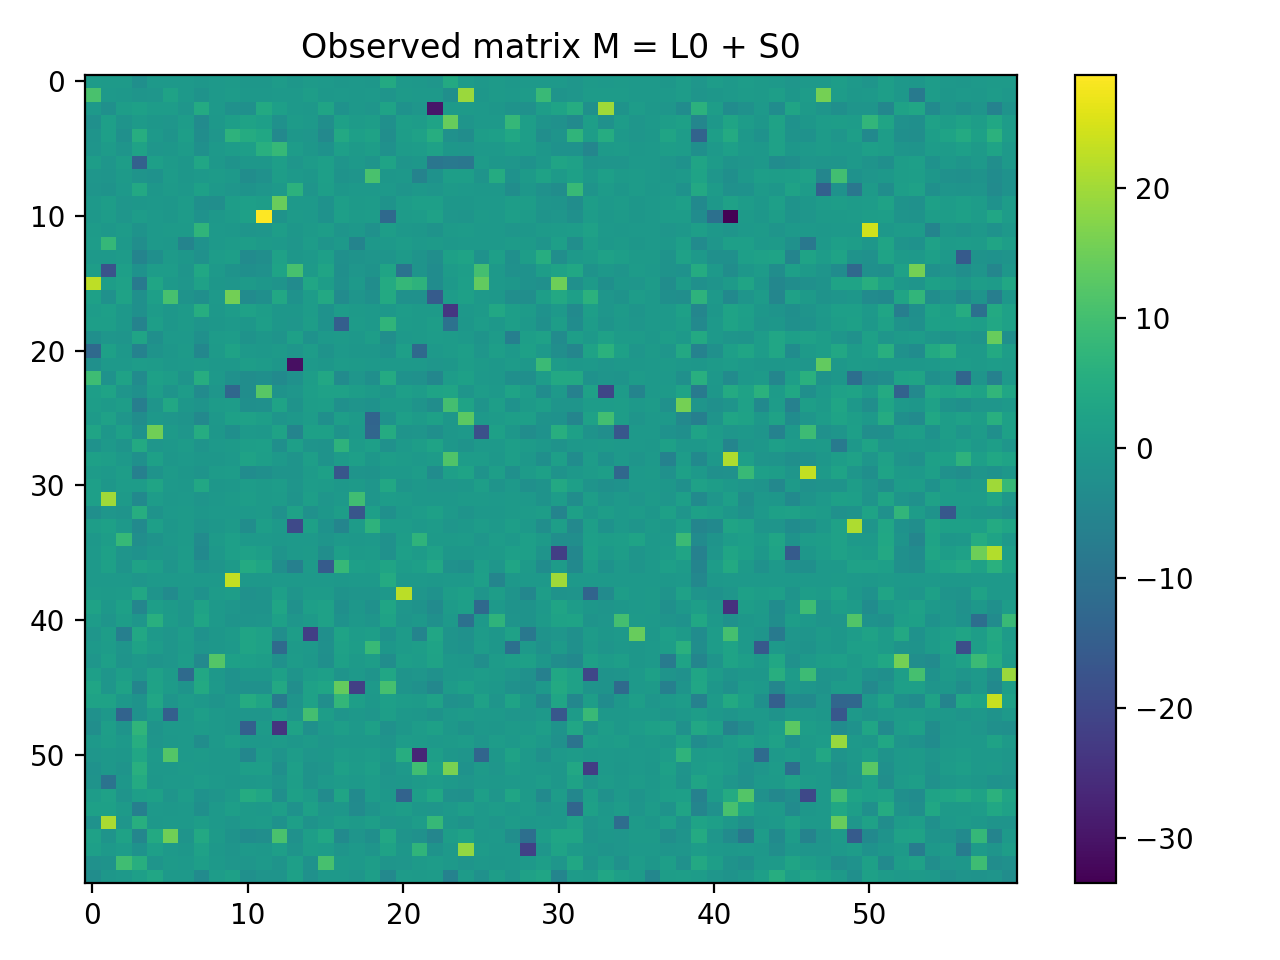

Recovered low-rank component: L


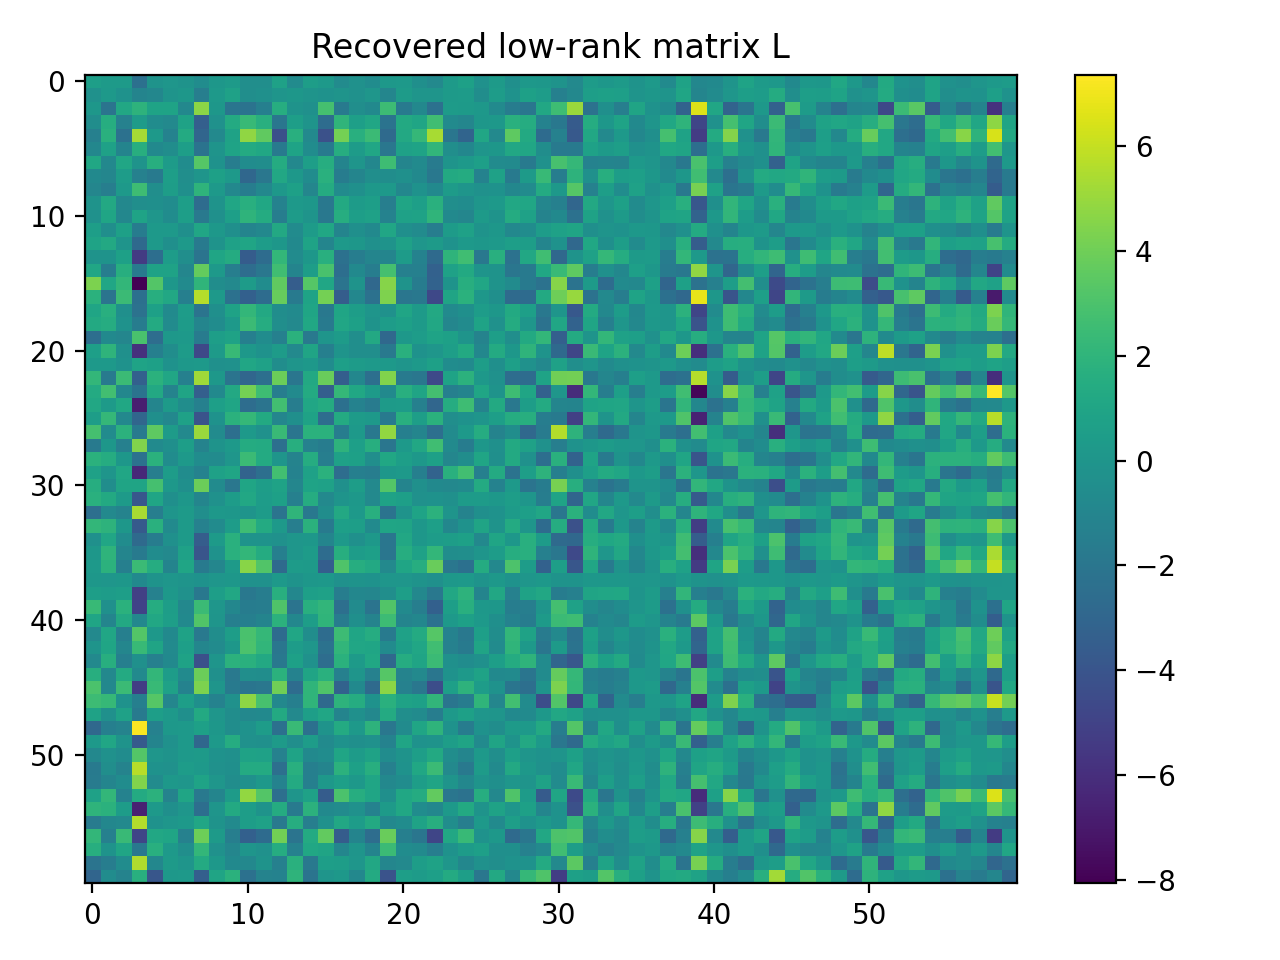

Recovered sparse component: S


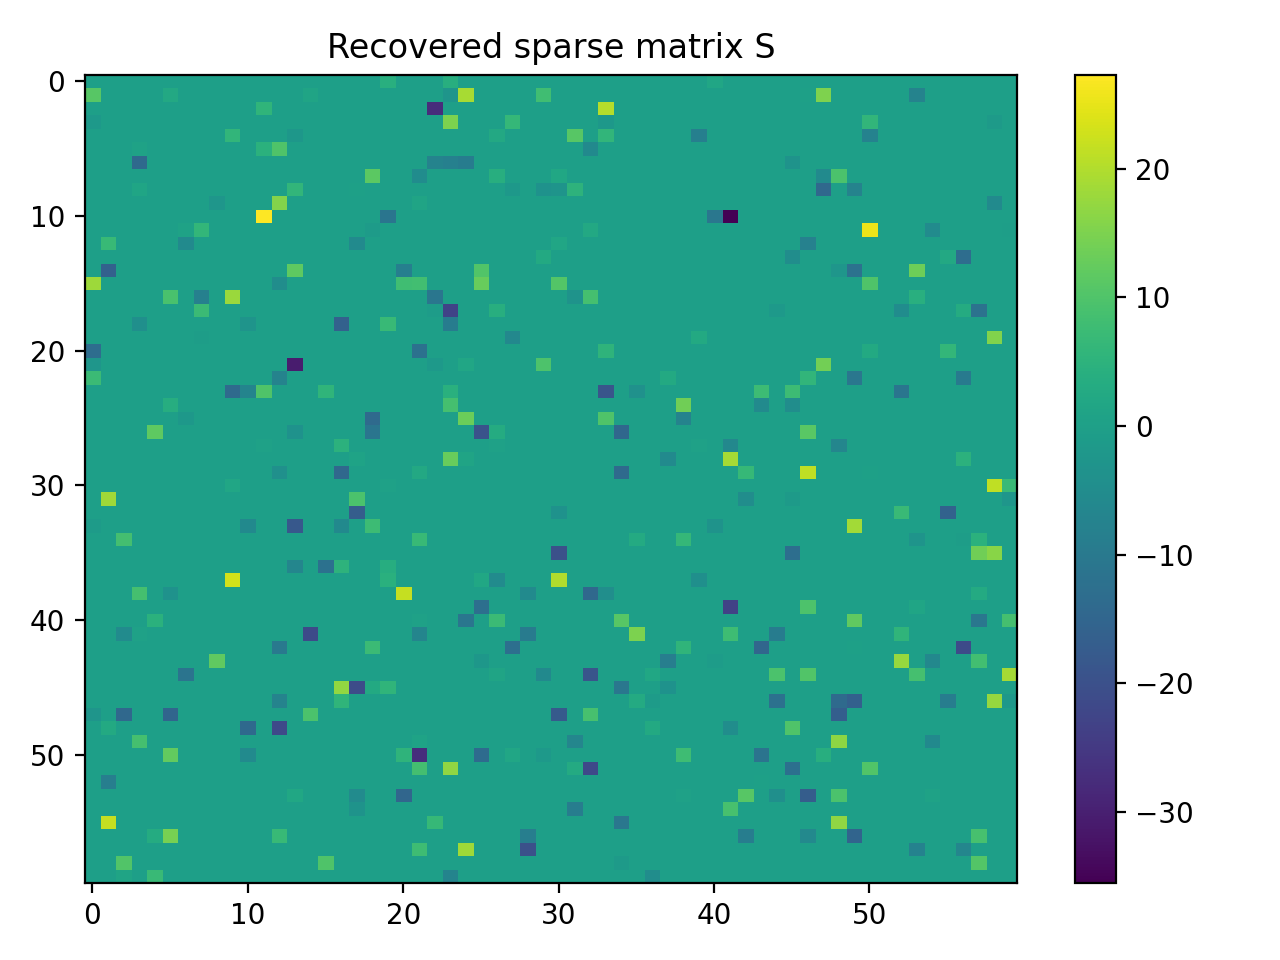

ADMM convergence: relative primal residual


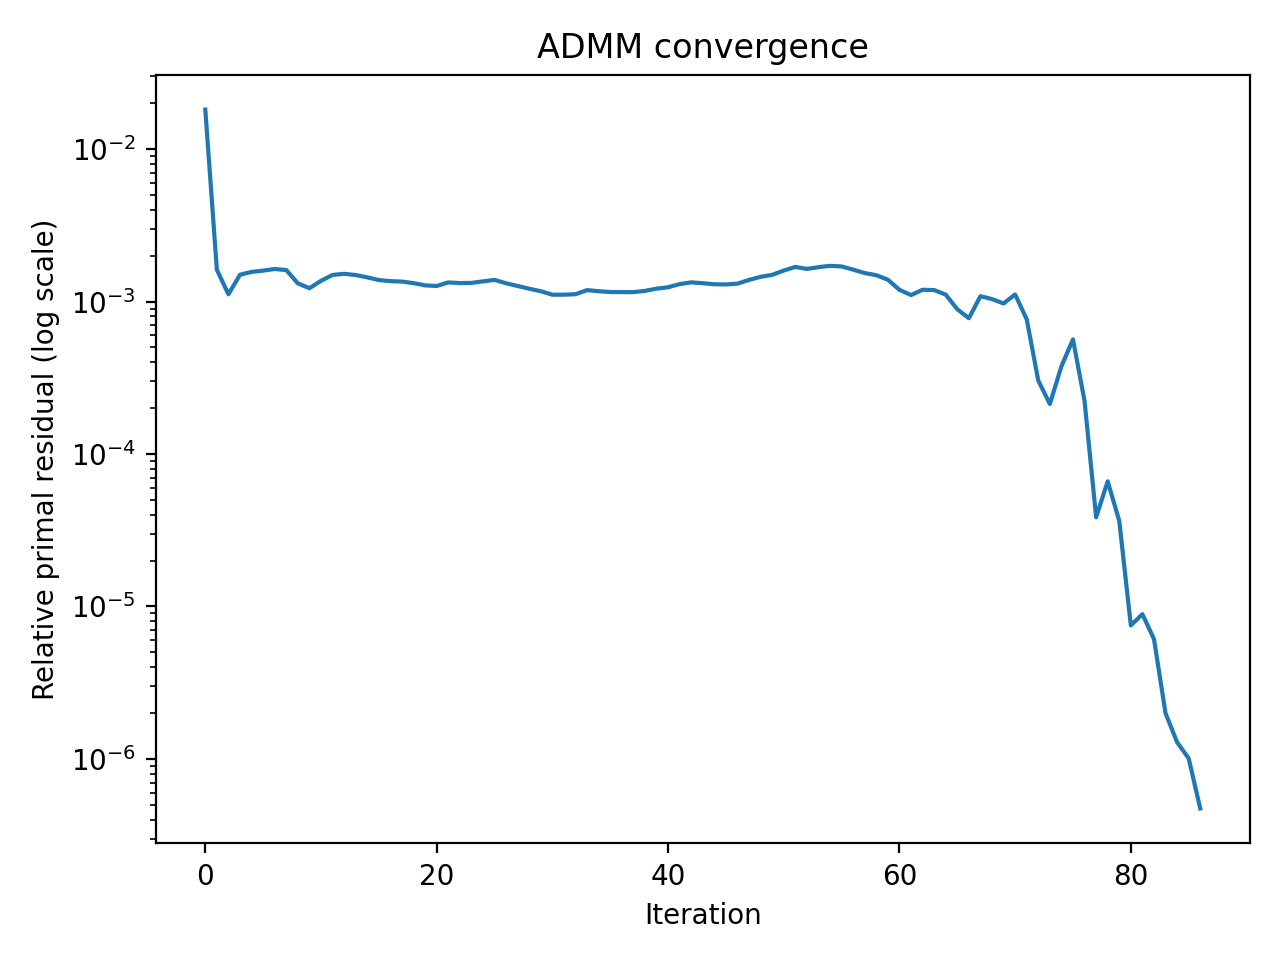

In [6]:
def show_image(filename: str, title: str) -> None:
    path = os.path.join(results_dir, filename)
    print(title)
    display(Image.open(path))

show_image("M_heatmap.png", "Observed matrix: M = L0 + S0")
show_image("L_heatmap.png", "Recovered low-rank component: L")
show_image("S_heatmap.png", "Recovered sparse component: S")
show_image("residual_curve.png", "ADMM convergence: relative primal residual")

In [4]:
log_path = os.path.join(results_dir, "log.txt")
with open(log_path, "r", encoding="utf-8") as f:
    log_text = f.read()

print(log_text)

--- Synthetic RPCA experiment ---
shape: (60, 60)
true rank: 3
true sparsity p: 0.1

lambda: 0.12909944487358055
rho: 1.0
converged: True
iterations: 87
final residual: 4.729e-07
reconstruction error: 4.729e-07
estimated rank(L): 3
sparsity fraction(S): 0.100



In [5]:
def extract_val(key: str, text: str):
    m = re.search(rf"{re.escape(key)}\s*:\s*([^\n]+)", text)
    return m.group(1).strip() if m else None

metrics = {
    "shape": extract_val("shape", log_text),
    "true rank": extract_val("true rank", log_text),
    "true sparsity p": extract_val("true sparsity p", log_text),
    "lambda": extract_val("lambda", log_text),
    "rho": extract_val("rho", log_text),
    "converged": extract_val("converged", log_text),
    "iterations": extract_val("iterations", log_text),
    "final residual": extract_val("final residual", log_text),
    "reconstruction error": extract_val("reconstruction error", log_text),
    "estimated rank(L)": extract_val("estimated rank(L)", log_text),
    "sparsity fraction(S)": extract_val("sparsity fraction(S)", log_text),
}

metrics

{'shape': '(60, 60)',
 'true rank': '3',
 'true sparsity p': '0.1',
 'lambda': '0.12909944487358055',
 'rho': '1.0',
 'converged': 'True',
 'iterations': '87',
 'final residual': '4.729e-07',
 'reconstruction error': '4.729e-07',
 'estimated rank(L)': '3',
 'sparsity fraction(S)': '0.100'}

## Parameter choices

**Synthetic data**
- **Matrix size (60×60):** small enough for fast runs, large enough for clear visualization
- **True rank (r = 3):** with rank much lower than the matrix size, making the structured component identifiable
- **Sparsity (p = 0.10):** 10% corruption is noticeable but not dominant
- **Outlier scale (10):** produces large-magnitude anomalies, highlighting the need for a robust method

**ADMM parameters**
- **ρ = 1.0:** baseline penalty parameter, commonly used as a starting point
- **tol = 1e−6:** reasonable accuracy target for validation
- **max_iter = 1000:** safe upper bound to avoid early termination


## Interpretation

- **Observed matrix \(M\):** It combines a structured low-rank component with sparse large outliers.
- **Recovered \(L\):** It is dense (as expected for low-rank structure) and does not contain isolated spikes. The reported rank matches the ground truth (rank ≈ 3).
- **Recovered \(S\):** It is mostly zero, with non-zeros concentrated on sparse locations, capturing outliers.
- **Convergence curve:** The relative primal residual decreases and falls below the tolerance, indicating that the constraint \(M ≈ L + S\) is satisfied.


## What does it mean “good results” here?

A successful **ADMM-based RPCA** run should satisfy the following criteria:

### 1. Feasibility (constraint satisfaction)

$$
\frac{\|M - L - S\|_F}{\|M\|_F} \ll 1
$$

This indicates that the constraint

$$
M \approx L + S
$$

is satisfied numerically.

### 2. Correct structure

- $L$ is **low-rank**
- $S$ is **sparse**

### 3. Recovery accuracy (synthetic case)

Since the ground truth is known, we additionally verify that:

- the estimated rank of $L$ matches the true rank  
- the sparsity fraction of $S$ matches the true corruption level  

Convergence speed (number of iterations) is useful, but not the main concern at this stage.
The main goal is stable convergence to a correct low-rank and sparse decomposition.




## Conclusion

The synthetic experiment validates our **ADMM-based RPCA** implementation:

- the algorithm converges and satisfies  
  $$
  M \approx L + S
  $$

- the recovered $L$ matches the intended low-rank structure (rank $\approx 3$)

- the recovered $S$ matches the intended sparsity level ($\approx 10\%$)

This provides confidence to apply the same implementation to real datasets  
(e.g., MNIST, Yale), where the ground-truth decomposition is unknown.

